In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("All_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),AirTemp (DegC),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,24.20,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,23.30,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,22.80,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,22.60,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,22.60,92.40,0.2
...,...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,2.29,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,2.33,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,2.12,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,1.91,101.22,0.0


In [10]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 200000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [11]:
data = np.loadtxt("All_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [12]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[-7.6445350e-03]
 [-1.0506965e-01]
 [ 2.4707510e-01]
 [-1.4058502e-04]
 [ 2.9850441e-01]
 [ 5.0470543e-01]
 [ 4.0261233e-01]
 [ 9.8217083e-03]] 
 w2:
 [[ 0.40669042]
 [-0.17494501]
 [ 0.48122948]
 [-0.05570289]
 [ 0.5843175 ]
 [-0.18495479]
 [-0.05300142]
 [ 0.3811704 ]] 
 bias: 0.15390213 
 loss: 19374.652 

step: 20000 
 w1:
 [[-8.8168221e-04]
 [ 1.0817019e-02]
 [-3.3261977e-02]
 [ 5.0957085e-05]
 [-4.8504524e-02]
 [ 2.8054315e-01]
 [ 2.2009949e-03]
 [-4.6897898e-03]] 
 w2:
 [[ 0.3117026 ]
 [-0.10864694]
 [ 0.18919553]
 [-0.051666  ]
 [ 0.22253218]
 [-0.37582466]
 [-0.43588275]
 [ 0.27850282]] 
 bias: -0.02656408 
 loss: 26.59381 

step: 30000 
 w1:
 [[-4.2734665e-04]
 [ 1.0716420e-02]
 [-4.9333114e-02]
 [-1.4595341e-06]
 [-3.8084503e-02]
 [ 8.7383784e-02]
 [ 6.6182204e-03]
 [-1.7543262e-03]] 
 w2:
 [[ 0.14852281]
 [-0.05990227]
 [ 0.47812635]
 [-0.00241544]
 [ 0.50263613]
 [-0.4847393 ]
 [-0.4698232 ]
 [ 0.11271393]] 
 bias: -0.34794834 
 loss: 2.092714 

step: 4

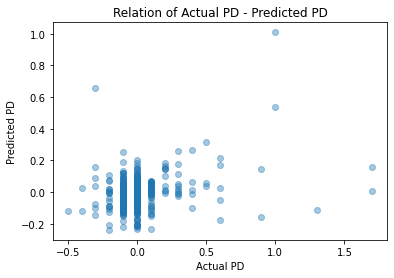

In [13]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [14]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.17916848
MAE: 0.09883836
